# 人脸检测案例
* 创建人脸检测应用, 获取API Key 和 Secret Key
* 获取Access Token
* 准备照片,填写参数
* 调用人脸检测的API,进行检测
* 显示检测结果

In [1]:
import urllib.request, urllib.parse
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
from pprint import pprint
import cv2

## 获取Access Token

In [2]:
# API KEY: geCvIhXiRUm3KqzGozC9lPms
# Secret key: dRPukMIbLAfSos7yqzOP4Linpb25g9V0

host = 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id=geCvIhXiRUm3KqzGozC9lPms&client_secret=dRPukMIbLAfSos7yqzOP4Linpb25g9V0'
# 创建 http 请求
request = urllib.request.Request(host)
request.add_header('Content-Type', 'Application/json; charset=UTF-8')

# 发送请求
response = urllib.request.urlopen(request)
content = response.read()
if (content):
    print(content.decode())

{"access_token":"24.0348d6d62bacdb3fae1431db1bd1b74d.2592000.1533880695.282335-11511733","session_key":"9mzdCytJB4tPm4XQk6nSy1ocKMEUdKXpBxEEtBdmU7iTXIPjEHeQMMWyS50tDi2lZLJWKqCQqy2ocgRbMjZ4Vboxk6+rTg==","scope":"public brain_all_scope vis-faceverify_faceverify_h5-face-liveness vis-faceverify_FACE_V3 wise_adapt lebo_resource_base lightservice_public hetu_basic lightcms_map_poi kaidian_kaidian ApsMisTest_Test\u6743\u9650 vis-classify_flower lpq_\u5f00\u653e cop_helloScope ApsMis_fangdi_permission smartapp_snsapi_base iop_autocar","refresh_token":"25.a292c58efe90edb226359adc5c764140.315360000.1846648695.282335-11511733","session_secret":"e3faa47b9dfc5afcc54c6a5865ee2545","expires_in":2592000}



In [3]:
access_token = json.loads(content.decode())['access_token']
print(access_token)

24.0348d6d62bacdb3fae1431db1bd1b74d.2592000.1533880695.282335-11511733


## 显示照片

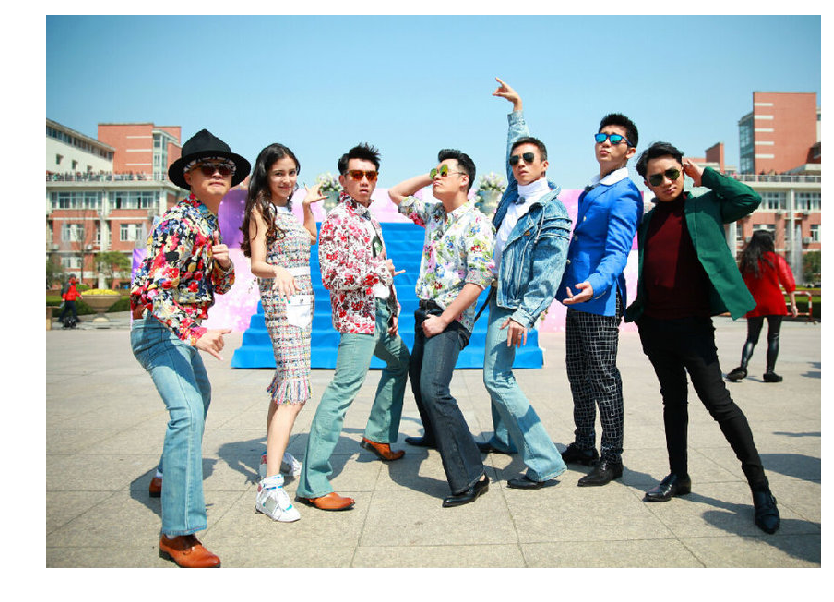

In [9]:
#读取并解码照片
image = mpimg.imread('.\data\images\stars.jpg')
plt.figure(figsize=(10,8), dpi=100)
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
## 准备照片 和参数
with open('.\data\images\stars.jpg', 'rb') as f:
    img_jpg = f.read()
    img64 = base64.b64encode(img_jpg)
    
    params = {}
    params['image'] = img64
    params['image_type'] = 'BASE64'
    params['face_field'] = 'age,gender'
    params['max_face_num'] = 10
    params['face_type'] = 'LIVE'
    
    params = urllib.parse.urlencode(params).encode()

In [6]:
# 调用 API
request_url = "https://aip.baidubce.com/rest/2.0/face/v3/detect" + "?access_token=" + access_token

# 构建http 请求
request = urllib.request.Request(request_url, data=params)
request.add_header('Content-Type', 'application/json; charset=UTF-8')

# 发送请求
response = urllib.request.urlopen(request)
content = response.read()

content_decoded = json.loads(content.decode())

In [7]:
pprint(content_decoded)

{'cached': 0,
 'error_code': 0,
 'error_msg': 'SUCCESS',
 'log_id': 6505790011019,
 'result': {'face_list': [{'age': 23,
                           'angle': {'pitch': -9.258248329,
                                     'roll': 0.008975180797,
                                     'yaw': -9.151642799},
                           'face_probability': 0.9910741448,
                           'face_token': '8dedde8cb1c5264e01426751312257d8',
                           'gender': {'probability': 0.9410704374,
                                      'type': 'male'},
                           'location': {'height': 35,
                                        'left': 155.9566498,
                                        'rotation': 0,
                                        'top': 160.5591888,
                                        'width': 45}},
                          {'age': 29,
                           'angle': {'pitch': 6.147875309,
                                     'roll': -22.10249901

## 显示边框

检测到的人脸数量:6


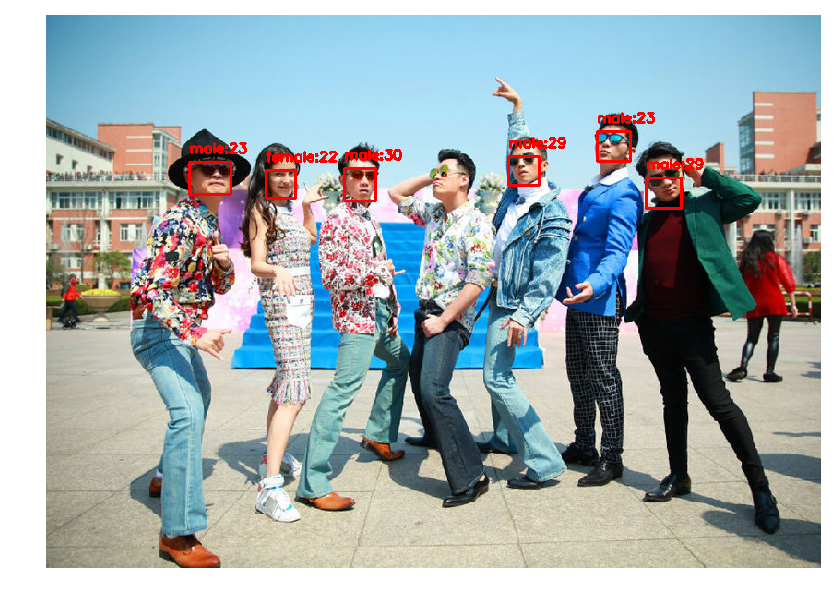

In [12]:
# 判断返回结果是否成功
if content_decoded['error_code'] == 0:
    result = content_decoded['result']
    print('检测到的人脸数量:{}'.format(result['face_num']))
    # 针对每一个检测到的人脸进行显示边框和年龄,性别
    for face in result['face_list']:
        # 只有当置信度大于0.8时, 认为成功检测到人脸
        if face['face_probability'] > 0.8:
            loc = face['location']
            pt1 = (int(loc['left']), int(loc['top']))
            pt2 = (int(loc['left'] + loc['width']), int(loc['top'] + loc['height']))
            
            # 画边框
            cv2.rectangle(image, pt1, pt2, color=(255, 0, 0), thickness=2)
            
            # 年龄和性别
            cv2.putText(image, "{}:{}".format(face['gender']['type'], face['age']), (pt1[0], pt1[1] - 10), 
                       fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(255,0,0), thickness=2)
        
    plt.figure(figsize=(10,8), dpi=100)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## SDK 方式调用服务

In [36]:
from aip import AipFace

client = AipFace('11511733', 'geCvIhXiRUm3KqzGozC9lPms', 'dRPukMIbLAfSos7yqzOP4Linpb25g9V0')

with open('.\data\images\stars.jpg', 'rb') as f:
    # 读取照片
    img_jpg = f.read()
    img64 = base64.b64encode(img_jpg).decode()
    imgType = 'BASE64'
    
    options = {}
    options['face_field'] = 'age,gender'
    options['max_face_num'] = 10
    options['face_type'] = 'LIVE'
    
    # 调用 人脸检测函数
    result =client.detect(img64, imgType, options)
    

In [37]:
pprint(result)

{'cached': 0,
 'error_code': 0,
 'error_msg': 'SUCCESS',
 'log_id': 8984052515101,
 'result': {'face_list': [{'age': 23,
                           'angle': {'pitch': -9.258248329,
                                     'roll': 0.008975180797,
                                     'yaw': -9.151642799},
                           'face_probability': 0.9910741448,
                           'face_token': '8dedde8cb1c5264e01426751312257d8',
                           'gender': {'probability': 0.9410704374,
                                      'type': 'male'},
                           'location': {'height': 35,
                                        'left': 155.9566498,
                                        'rotation': 0,
                                        'top': 160.5591888,
                                        'width': 45}},
                          {'age': 29,
                           'angle': {'pitch': 6.147875309,
                                     'roll': -22.10249901